In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./artifacts/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [7]:
classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
y_predictions = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predictions)
cm

array([[21,  2],
       [ 5, 12]], dtype=int64)

In [10]:
def plot_contour_graph(X_point, y_point):
    from matplotlib.colors import ListedColormap
    # X_point, y_point = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_point)):
        plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                    c = ListedColormap(('green', 'blue'))(i), label = j)
    plt.title('K-NN Training set')
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.legend()

C:\Users\Samir Ahmad\AppData\Local\Temp\ipykernel_11616\1669200684.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],


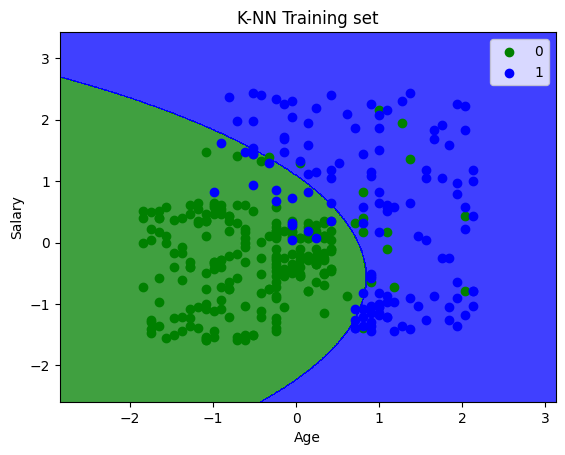

In [11]:
plot_contour_graph(X_train, y_train)

C:\Users\Samir Ahmad\AppData\Local\Temp\ipykernel_11616\1669200684.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],


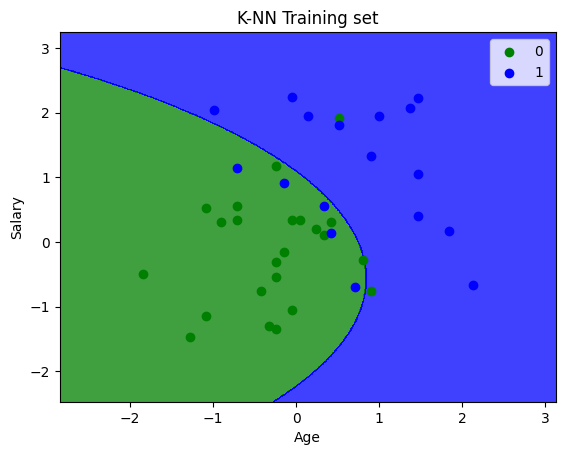

In [12]:
plot_contour_graph(X_test, y_test)